<a href="https://colab.research.google.com/github/amirbavand/fastbook/blob/master/building_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


In [11]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [12]:
print('this is a simple location classifer')

this is a simple location classifer


In [ ]:
subscription_key = "key" # hear i should put subscription key for bing api of microsoft azure
search_url = "https://api.bing.microsoft.com/v7.0/images/search"
search_term1= "house in canada"
search_term2="house image in iran"
search_term3='house image in china'

headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
params  = {"q": search_term1, "license": "public", "imageType": "photo", "count": 200}

response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()
search_results = response.json()
canada_house = [img["thumbnailUrl"] for img in search_results["value"][:200]]
params  = {"q": search_term2, "license": "public", "imageType": "photo", "count": 200}
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()
search_results = response.json()
iran_house= [img["thumbnailUrl"] for img in search_results["value"][:200]]


params  = {"q": search_term3, "license": "public", "imageType": "photo", "count": 200}
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()
search_results = response.json()
china_house= [img["thumbnailUrl"] for img in search_results["value"][:200]]

In [14]:
house_location = 'canada','iran','china'
path = Path('/content/gdrive/My Drive/projects/fastbook/houses')
path_string=('/content/gdrive/My Drive/projects/fastbook/houses/')


In this follosing cell, we download the dataset and save it to use our training and validation sets.

In [ ]:
if not path.exists() :



  path.mkdir()
  for o in house_location:
    print("hi")
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    if(o=='canada'):
      results=canada_house
    elif(o=='iran'):
      results=iran_house
    elif(o=='china'):
      results=china_house

    i=0
    for url in results:

      path_image=path_string+o+'/'+o+str(i)+'.jpg'
      i+=1
      download_url(url,path_image)

In [6]:
import os
import glob

#files = glob.glob('/content/houses/canada/*')
#for f in files:
#    os.remove(f)


in the bellow cell, we discard the corrupt links

In [15]:
fns = get_image_files(path)
print(len(fns))
failed = verify_images(fns)
failed
failed.map(Path.unlink);

450


In [16]:
houses = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [31]:
dls = houses.dataloaders(path)
#dls.valid.show_batch(max_n=2, nrows=)

In [ ]:
doc(aug_transforms)

In [29]:
houses = houses.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = houses.dataloaders(path)
#dls.valid.show_batch(max_n=2, nrows=1)

In [30]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.800151,0.949905,0.388889,00:03


epoch,train_loss,valid_loss,error_rate,time
0,1.027020,0.723376,0.322222,00:03
1,0.838442,0.619022,0.255556,00:03
2,0.747941,0.559485,0.200000,00:03
3,0.641449,0.559550,0.177778,00:03
4,0.584417,0.557286,0.188889,00:04


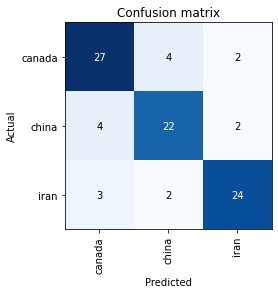

In [32]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [28]:
#interp.plot_top_losses(50, nrows=10)

Now we are going to extract the model file and use it to predict based on it 

In [36]:
doc(learn.export)

In [37]:
learn.export(fname='location_classification_model.pkl')

In [38]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('location_classification_model.pkl')]

In [40]:
learn_inf = load_learner('location_classification_model.pkl')

In [41]:
learn_inf.predict('/content/Property-dda9000000000146000155e2a18a-21408221.jpg')

('canada', TensorImage(0), TensorImage([0.6761, 0.3189, 0.0051]))